In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Data Preprocessing

In [2]:
ratings = pd.read_csv('C:/Users/mahi/Documents/recommendations/Dataset.csv')
movies = pd.read_csv('C:/Users/mahi/Documents/recommendations/Movie_Id_Titles.csv')
display(ratings.head())
display(movies.head())

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
# merge the datasets
data = pd.merge(ratings, movies, on='item_id')

# Display the merged dataset
display(data.head())

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


# Data Visualization

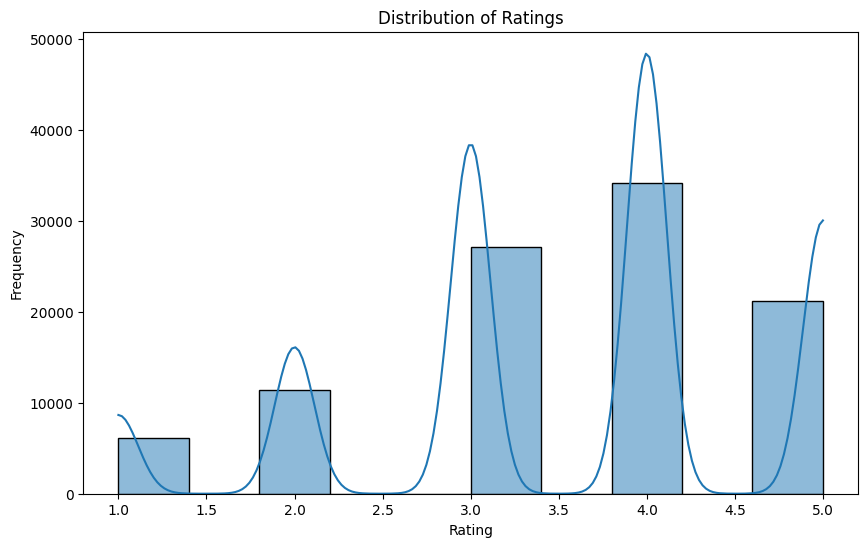

In [4]:
# plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Content-Based Filtering

In [5]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# fit and transform the movie titles
tfidf_matrix = tfidf.fit_transform(movies['title'])

# compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [6]:
# function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies.index[movies['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# get recommendations 
recommendations = get_recommendations('Toy Story (1995)')
print(recommendations)

1071                    Pyromaniac's Love Story, A (1995)
1343                         Story of Xinghua, The (1993)
477                        Philadelphia Story, The (1940)
547                     NeverEnding Story III, The (1994)
307                        FairyTale: A True Story (1997)
1052                                  Now and Then (1995)
1546                                     Show, The (1995)
1589                               To Have, or Not (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
598     Police Story 4: Project S (Chao ji ji hua) (1993)
Name: title, dtype: object


# Collaborative Filtering

In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
# create user-item matrix
user_item_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

In [9]:
# apply SVD
svd = TruncatedSVD(n_components=20)
matrix = svd.fit_transform(user_item_matrix)
scaler = StandardScaler()
matrix = scaler.fit_transform(matrix)


In [10]:
# compute cosine similarity
user_similarity = cosine_similarity(matrix)

# function to get similar users
def get_similar_users(user_id, user_similarity=user_similarity):
    sim_scores = list(enumerate(user_similarity[user_id]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar users
    user_indices = [i[0] for i in sim_scores]
    return user_indices

# get similar users to user_id 0
similar_users = get_similar_users(0)
print(similar_users)

[369, 51, 245, 202, 55, 700, 797, 182, 584, 310]
